### K近邻算法实现与应用

In [1]:
# KNN 分类流程
import numpy as np

# 构造一批数据
def create_data():
    features = np.array(
        [
            [2.88, 3.05],
            [3.1, 2.45],
            [3.05, 2.8],
            [2.9, 2.7],
            [2.75, 3.4],
            [3.23, 2.9],
            [3.2, 3.75],
            [3.5, 2.9],
            [3.65, 3.6],
            [3.35, 3.3],
        ]
    )
    labels = ["A", "A", "A", "A", "A", "B", "B", "B", "B", "B"]
    return features, labels
    
features, labels = create_data()
print("features: \n", features)
print("labels: \n", labels)

features: 
 [[2.88 3.05]
 [3.1  2.45]
 [3.05 2.8 ]
 [2.9  2.7 ]
 [2.75 3.4 ]
 [3.23 2.9 ]
 [3.2  3.75]
 [3.5  2.9 ]
 [3.65 3.6 ]
 [3.35 3.3 ]]
labels: 
 ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']


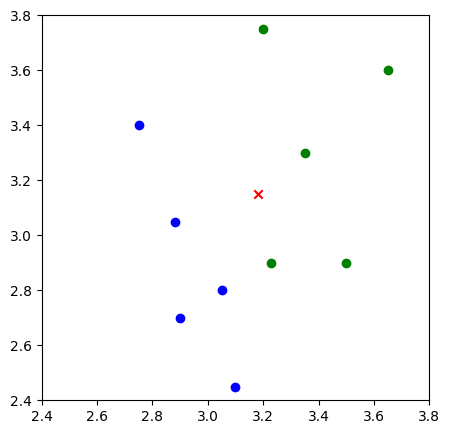

In [2]:
# 数据可视化
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(5, 5))
plt.xlim((2.4, 3.8))
plt.ylim((2.4, 3.8))

x_feature = list(map(lambda x: x[0], features))  # 返回每个数据的x特征值
y_feature = list(map(lambda y: y[1], features))

plt.scatter(x_feature[:5], y_feature[:5], c="b")  # 在画布上绘画出"A"类标签的数据点
plt.scatter(x_feature[5:], y_feature[5:], c="g")
plt.scatter([3.18], [3.15], c="r", marker="x")  # 待测试点的坐标为 [3.1，3.2]

In [3]:
# 度量两个样本间的相似度，最常用的两个公式
# 欧氏距离、曼哈顿距离
def d_man(x, y):
    d = np.sum(np.abs(x - y))
    return d

def d_euc(x, y):
    d = np.sqrt(np.sum(np.square(x - y)))
    return d

In [4]:
# 在进行决策时，有两种规则
# 多数表决法：在K个邻居中选择类别最多的种类作为测试样本的类别
# 加权表决法：根据距离的远近，对近邻的投票进行加权，距离越近则权重越大

# 推荐多数表决法，更简单
import operator


def majority_voting(class_count):
    # 多数表决函数
    sorted_class_count = sorted(
        class_count.items(), key=operator.itemgetter(1), reverse=True
    )
    return sorted_class_count


arr = {"A": 3, "B": 2, "C": 6, "D": 5}
majority_voting(arr)

[('C', 6), ('D', 5), ('A', 3), ('B', 2)]

在学习完以上的各个步骤之后，KNN 算法也逐渐被勾勒出来。以下就是对 KNN 算法的完整实现，本次实验的距离计算采用欧式距离，分类的决策规则为多数表决法，定义函数 `knn_classify()`，其中函数的参数包括：
* test_data: 用于分类的输入向量
* train_data: 输入的训练样本集
* labels: 样本数据的类标签向量
* k: 用于选择最近邻居的数目

In [5]:
def knn_classify(test_data, train_data, labels, k):
    # KNN 方法完整实现
    distances = np.array([])  # 创建一个空的数组用于存放距离

    for each_data in train_data:  # 使用欧式距离计算数据相似度
        d = d_euc(test_data, each_data)
        distances = np.append(distances, d)

    sorted_distance_index = distances.argsort()  # 获取按距离从小到大排序后的索引
    sorted_distance = np.sort(distances)
    r = (sorted_distance[k] + sorted_distance[k - 1]) / 2  # 计算

    class_count = {}
    for i in range(k):  # 多数表决
        vote_label = labels[sorted_distance_index[i]]
        class_count[vote_label] = class_count.get(vote_label, 0) + 1

    final_label = majority_voting(class_count)
    return final_label, r

In [6]:
test_data = np.array([3.18, 3.15])
final_label, r = knn_classify(test_data, features, labels, 5)
final_label

[('B', 3), ('A', 2)]

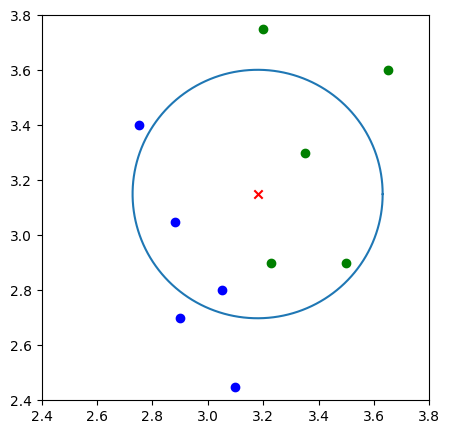

In [7]:
# 可视化
def circle(r, a, b):  # 为了画出圆，这里采用极坐标的方式对圆进行表示 ：x=r*cosθ，y=r*sinθ。
    theta = np.arange(0, 2 * np.pi, 0.01)
    x = a + r * np.cos(theta)
    y = b + r * np.sin(theta)
    return x, y

k_circle_x, k_circle_y = circle(r, 3.18, 3.15)

plt.figure(figsize=(5, 5))
plt.xlim((2.4, 3.8))
plt.ylim((2.4, 3.8))

x_feature = list(map(lambda x: x[0], features))  # 返回每个数据的 x 特征值
y_feature = list(map(lambda y: y[1], features))

plt.scatter(x_feature[:5], y_feature[:5], c="b")  # 在画布上绘画出"A"类标签的数据点
plt.scatter(x_feature[5:], y_feature[5:], c="g")
plt.scatter([3.18], [3.15], c="r", marker="x")  # 待测试点的坐标为 [3.1，3.2]
plt.plot(k_circle_x, k_circle_y)

In [8]:
# 通过交互式菜单观察K值对于预测结果的影响
from ipywidgets import interact, fixed


def change_k(test_data, features, k):
    final_label, r = knn_classify(test_data, features, labels, k)
    k_circle_x, k_circle_y = circle(r, 3.18, 3.15)

    plt.figure(figsize=(5, 5))
    plt.xlim((2.4, 3.8))
    plt.ylim((2.4, 3.8))

    x_feature = list(map(lambda x: x[0], features))  # 返回每个数据的 x 特征值
    y_feature = list(map(lambda y: y[1], features))

    plt.scatter(x_feature[:5], y_feature[:5], c="b")  # 在画布上绘画出"A"类标签的数据点
    plt.scatter(x_feature[5:], y_feature[5:], c="g")
    plt.scatter([3.18], [3.15], c="r", marker="x")  # 待测试点的坐标为 [3.1，3.2]
    plt.plot(k_circle_x, k_circle_y)

interact(
    change_k, test_data=fixed(test_data), features=fixed(features), k=[3, 5, 7, 9]
)  # 可交互式绘图

interactive(children=(Dropdown(description='k', options=(3, 5, 7, 9), value=3), Output()), _dom_classes=('widg…

<function __main__.change_k(test_data, features, k)>

In [ ]:
# 加载数据集进行实操
import pandas as pd

lilac_data = pd.read_csv("course-9-syringa.csv")
lilac_data.head()  # 预览前 5 行

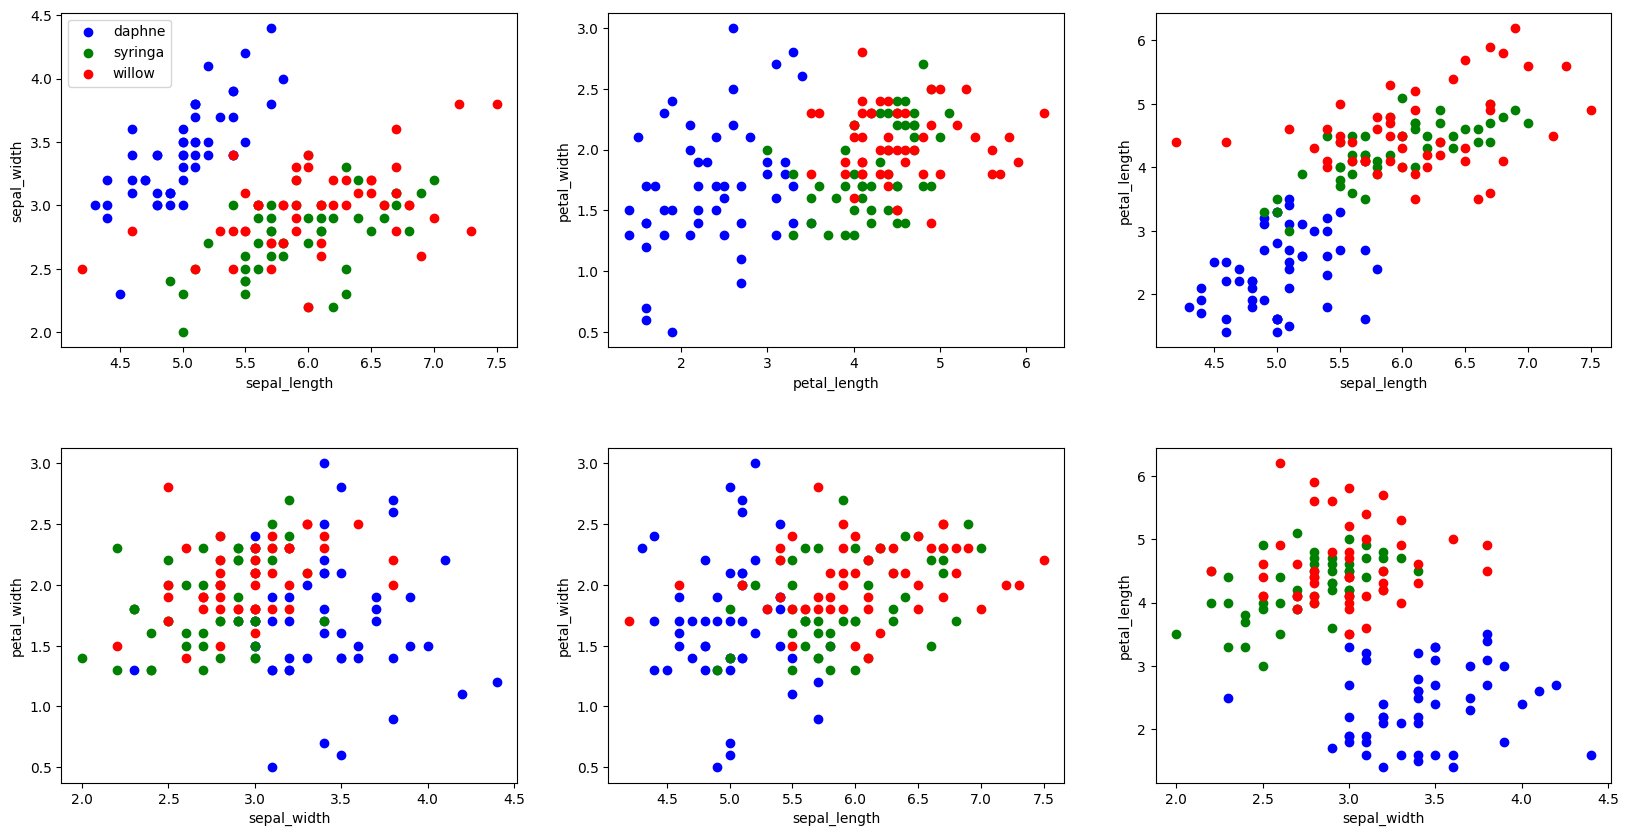

In [10]:
# 将数据集的特征绘制出来，采用特征组合的方式，两两组合，共有6种情况
"""绘制丁香花特征子图
"""
fig, axes = plt.subplots(2, 3, figsize=(20, 10))  # 构建生成 2*3 的画布，2 行 3 列
fig.subplots_adjust(hspace=0.3, wspace=0.2)  # 定义每个画布内的行间隔和高间隔

axes[0, 0].set_xlabel("sepal_length")  # 定义 x 轴坐标值
axes[0, 0].set_ylabel("sepal_width")  # 定义 y 轴坐标值
axes[0, 0].scatter(lilac_data.sepal_length[:50], lilac_data.sepal_width[:50], c="b")
axes[0, 0].scatter(
    lilac_data.sepal_length[50:100], lilac_data.sepal_width[50:100], c="g"
)
axes[0, 0].scatter(lilac_data.sepal_length[100:], lilac_data.sepal_width[100:], c="r")
axes[0, 0].legend(["daphne", "syringa", "willow"], loc=2)  # 定义示例

axes[0, 1].set_xlabel("petal_length")
axes[0, 1].set_ylabel("petal_width")
axes[0, 1].scatter(lilac_data.petal_length[:50], lilac_data.petal_width[:50], c="b")
axes[0, 1].scatter(
    lilac_data.petal_length[50:100], lilac_data.petal_width[50:100], c="g"
)
axes[0, 1].scatter(lilac_data.petal_length[100:], lilac_data.petal_width[100:], c="r")

axes[0, 2].set_xlabel("sepal_length")
axes[0, 2].set_ylabel("petal_length")
axes[0, 2].scatter(lilac_data.sepal_length[:50], lilac_data.petal_length[:50], c="b")
axes[0, 2].scatter(
    lilac_data.sepal_length[50:100], lilac_data.petal_length[50:100], c="g"
)
axes[0, 2].scatter(lilac_data.sepal_length[100:], lilac_data.petal_length[100:], c="r")

axes[1, 0].set_xlabel("sepal_width")
axes[1, 0].set_ylabel("petal_width")
axes[1, 0].scatter(lilac_data.sepal_width[:50], lilac_data.petal_width[:50], c="b")
axes[1, 0].scatter(
    lilac_data.sepal_width[50:100], lilac_data.petal_width[50:100], c="g"
)
axes[1, 0].scatter(lilac_data.sepal_width[100:], lilac_data.petal_width[100:], c="r")

axes[1, 1].set_xlabel("sepal_length")
axes[1, 1].set_ylabel("petal_width")
axes[1, 1].scatter(lilac_data.sepal_length[:50], lilac_data.petal_width[:50], c="b")
axes[1, 1].scatter(
    lilac_data.sepal_length[50:100], lilac_data.petal_width[50:100], c="g"
)
axes[1, 1].scatter(lilac_data.sepal_length[100:], lilac_data.petal_width[100:], c="r")

axes[1, 2].set_xlabel("sepal_width")
axes[1, 2].set_ylabel("petal_length")
axes[1, 2].scatter(lilac_data.sepal_width[:50], lilac_data.petal_length[:50], c="b")
axes[1, 2].scatter(
    lilac_data.sepal_width[50:100], lilac_data.petal_length[50:100], c="g"
)
axes[1, 2].scatter(lilac_data.sepal_width[100:], lilac_data.petal_length[100:], c="r")

In [18]:
# 数据集切分，训练测试七三开
from sklearn.model_selection import train_test_split

# 得到 lilac 数据集中 feature 的全部序列: sepal_length,sepal_width,petal_length,petal_width
feature_data = lilac_data.iloc[:, :-1]
label_data = lilac_data["labels"]  # 得到 lilac 数据集中 label 的序列

X_train, X_test, y_train, y_test = train_test_split(
    feature_data, label_data, test_size=0.3, random_state=2
)

X_test  # 输出 lilac_test 查看

,sepal_length,sepal_width,petal_length,petal_width
6,4.6,3.4,2.5,1.6
3,4.6,3.1,1.6,1.7
113,5.1,2.5,4.6,2.0
12,4.8,3.0,2.2,1.5
24,4.8,3.4,2.1,2.2
129,6.2,3.0,4.0,1.6
25,5.0,3.0,3.3,1.7
108,5.7,2.5,4.1,2.8
128,5.9,2.8,4.1,2.1
45,4.8,3.0,1.9,1.5


在实战中，我们更常使用 scikit-learn 库中 KNN 函数实现数据的分类
`sklearn.neighbors.KNeighborsClassifier((n_neighbors=5, weights='uniform', algorithm='auto')`
其中：
* n_neighbors : k 值，表示邻近个数，默认为 5
* weights : 决策规则选择，多数表决或加权表决，可用参数（'uniform','distance'）
* algorithm : 搜索算法选择（auto，kd_tree, ball_tree），包括逐一搜索，kd 树搜索或 ball 树搜索

In [19]:
from sklearn.neighbors import KNeighborsClassifier


def sklearn_classify(train_data, label_data, test_data, k_num):
    # 使用 sklearn 构建 KNN 预测模型
    knn = KNeighborsClassifier(n_neighbors=k_num)
    # 训练数据集
    knn.fit(train_data, label_data)
    # 预测
    predict_label = knn.predict(test_data)
    # 返回预测值
    return predict_label

# 使用测试数据进行预测
y_predict = sklearn_classify(X_train, y_train, X_test, 3)
y_predict

array(['daphne', 'daphne', 'willow ', 'daphne', 'daphne', 'willow ',
       'daphne', 'syringa', 'willow ', 'daphne', 'daphne', 'daphne',
       'daphne', 'daphne', 'syringa', 'syringa', 'syringa', 'willow ',
       'syringa', 'willow ', 'syringa', 'willow ', 'willow ', 'syringa',
       'syringa', 'daphne', 'daphne', 'willow ', 'daphne', 'willow ',
       'willow ', 'daphne', 'syringa', 'willow ', 'willow ', 'daphne',
       'willow ', 'willow ', 'syringa', 'willow ', 'willow ', 'willow ',
       'willow ', 'syringa', 'daphne'], dtype=object)

In [20]:
# 准确率计算
def get_accuracy(test_labels, pred_labels):
    # 准确率计算函数
    correct = np.sum(test_labels == pred_labels)  # 计算预测正确的数据个数
    n = len(test_labels)  # 总测试集数据个数
    accur = correct / n
    return accur

get_accuracy(y_test, y_predict)

np.float64(0.7777777777777778)

从上面可以看出分类的准确率不高，分类效果不理想。因此K值的选取是一个问题，一般来说不超过样本数量的平方根

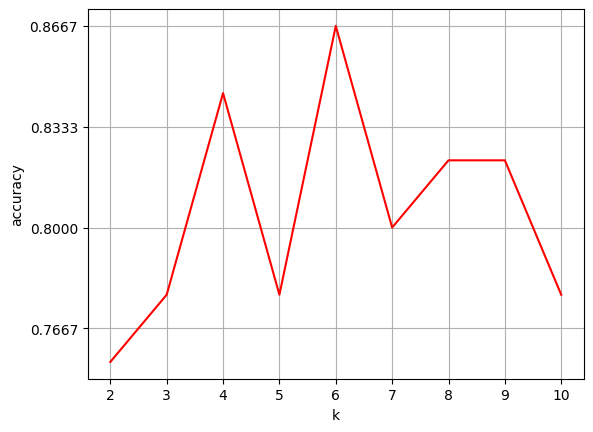

In [21]:
# 遍历2~10作为K值，计算准确率
normal_accuracy = []  # 建立一个空的准确率列表
k_value = range(2, 11)
for k in k_value:
    y_predict = sklearn_classify(X_train, y_train, X_test, k)
    accuracy = get_accuracy(y_test, y_predict)
    normal_accuracy.append(accuracy)

plt.xlabel("k")
plt.ylabel("accuracy")
new_ticks = np.linspace(0.6, 0.9, 10)  # 设定 y 轴显示，从 0.6 到 0.9
plt.yticks(new_ticks)
plt.plot(k_value, normal_accuracy, c="r")
plt.grid(True)  # 给画布增加网格

### Kd树
Kd 树（英文：K-dimension tree）是一种对 K 维空间中的实例点进行存储以便对其进行快速检索的树形数据结构。
Kd 树是一种二叉树，表示对 K 维空间的一个划分，构造 Kd 树相当于不断地用垂直于坐标轴的超平面将 K 维空间切分，构成一系列的 K 维超矩形区域。
Kd 树的每个结点对应于一个 K 维超矩形区域。利用 Kd 树可以省去对大部分数据点的搜索，从而减少搜索的计算量。